# Beatiful soup pour enlever les Balise dans le text + API google NLP

# Classification multi label (associé plusieurs tag en sortie)

## INTRODUCTION ==> TBD

# ATTENTION AU TEXTE TYPE C++, notre Expression Regulière supprimme les + ==> Perte d'information ?

Notre projet est décomposé en 3 parties :

- <b>L'Exploration</b>, le Nettoyage (Exploratory Data Analysis (EDA)) et la Normalisation du Texte.
- <b>La Transformation</b> du texte et la création de features
- <b>La Classification</b> du Texte à l'aide du ML

# <font color = Green>Partie 1 : Exploratory Data Analysis</font>

Objectifs :
- Comprendre la forme et la structure de nos données
- Faire un premier netttoyage de nos données
- Avoir une première représentation de nos données
- Repérer des patterns dans nos données

## <font color = purple>1. Préléminaires</font>

### <font color = grey>1.1 Contexte</font>

Bibliothèque de prétraitement : nltk et spacy.
</br>nltk est simple mais un peu désuet. Il reste toutefois très utile pour les traitements de bases. 
</br>Spacy est une bibliothèque plus récente permettant des traitements plus petinents.

### <font color = grey>1.2 Librairies</font>

In [1]:
#Librairies classiques
import os, sys, time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Contenu du repertoire
!tree

Folder PATH listing for volume OS
Volume serial number is 6A45-4B07
C:.
+---cleaned
�   +---.ipynb_checkpoints
+---source


### <font color = grey>1.3 Chargement des données</font>

In [3]:
#Chemin de notre fichier source
data = "./source/"
os.listdir(data)

['QueryResults.csv']

In [4]:
#Chargement du Dataframe
fn = data + 'QueryResults.csv'
df = pd.read_csv(fn)
df.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,"Differences between declare, typeset and local...","<p>When typing variables in Bash, what is the ...",<bash><shell><variables><scope><declare>,4419704,57,25057,11,3
1,Dealing with PHP server and MySQL server in di...,<p>For those of us who use standard shared hos...,<php><mysql><datetime><date><timezone>,18449,12,7651,11,5
2,Difference between async/await and ES6 yield w...,<p>I was just reading this fantastic article «...,<javascript><node.js><ecmascript-6><generator>...,36196608,97,56536,31,8
3,Loading System.ServiceModel configuration sect...,"<p>Using C# .NET 3.5 and WCF, I'm trying to wr...",<c#><.net><xml><wcf><configurationmanager>,19589,64,59775,16,5
4,XML Serialization and Inherited Types,"<p>Following on from my <a href=""https://stack...",<c#><xml><inheritance><serialization><xml-seri...,20084,86,56971,42,7


-----

## <font color = purple>2. Premier apperçu des données</font>

### <font color = grey>2.1 Affichage du dataframe</font>

In [5]:
#5 premiers éléments
df.head(5)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,"Differences between declare, typeset and local...","<p>When typing variables in Bash, what is the ...",<bash><shell><variables><scope><declare>,4419704,57,25057,11,3
1,Dealing with PHP server and MySQL server in di...,<p>For those of us who use standard shared hos...,<php><mysql><datetime><date><timezone>,18449,12,7651,11,5
2,Difference between async/await and ES6 yield w...,<p>I was just reading this fantastic article «...,<javascript><node.js><ecmascript-6><generator>...,36196608,97,56536,31,8
3,Loading System.ServiceModel configuration sect...,"<p>Using C# .NET 3.5 and WCF, I'm trying to wr...",<c#><.net><xml><wcf><configurationmanager>,19589,64,59775,16,5
4,XML Serialization and Inherited Types,"<p>Following on from my <a href=""https://stack...",<c#><xml><inheritance><serialization><xml-seri...,20084,86,56971,42,7


In [6]:
#5 derniers éléments
df.tail(5)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
27650,ETL in Java Spring Batch vs Apache Spark Bench...,<p>I have been working with Apache Spark + Sca...,<spring><spring-boot><apache-spark><spring-bat...,53689531,20,11914,12,1
27651,Errors installing Composer on macOS (JIT compi...,<p>When I run <code>composer --version</code> ...,<php><macos><composer-php><jit><php-7.3>,53690624,63,34213,18,8
27652,Performant cartesian product (CROSS JOIN) with...,<blockquote>\n <p>The contents of this post w...,<python><pandas><numpy><dataframe><merge>,53699012,68,23298,24,5
27653,What is the spring-boot-configuration-processo...,<h1>Introduction</h1>\n\n<p>So I noticed the f...,<java><spring><maven><spring-boot><gradle>,53707080,59,53974,12,2
27654,Cannot add task 'wrapper' as a task with that ...,<p>When installing <strong>'react-native init ...,<android><reactjs><react-native><wrapper><expo>,53709282,141,97914,19,7


In [7]:
#5 individus au hasard (sample)
df.sample(5)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
19612,How to use Smack 4.1 in Android?,"<p>I was looking at this answer <a href=""https...",<java><android><eclipse><xmpp><smack>,26965506,25,23428,17,1
8629,Windows command to convert Unix line endings?,<p>Is there a Windows command to convert line ...,<windows><unix><batch-file><cmd><eol>,17579553,80,144509,19,17
13383,how to update the multiple rows at a time usin...,<p>Table:</p>\n<pre><code>id userid frien...,<c#><sql><entity-framework><linq><linq-to-sql>,10314552,104,185638,38,3
9567,How could I replace UIMenuController with my o...,"<p>When text is selected, by default a UIMenuC...",<iphone><ios><objective-c><ipad><uimenucontrol...,14595587,22,9392,19,2
19714,presentViewController: crash on iOS <6 (AutoLa...,<p>This is a weird crash I am getting. The cra...,<objective-c><ios><xcode><crash><stack-trace>,11198981,92,25365,22,4


### <font color = grey>2.2. Structure</font>

In [8]:
#Taille du dataframe
df.shape

(27655, 8)

In [9]:
#Type de données
df.dtypes

Title            object
Body             object
Tags             object
Id                int64
Score             int64
ViewCount         int64
FavoriteCount     int64
AnswerCount       int64
dtype: object

In [10]:
#Information du Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27655 entries, 0 to 27654
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          27655 non-null  object
 1   Body           27655 non-null  object
 2   Tags           27655 non-null  object
 3   Id             27655 non-null  int64 
 4   Score          27655 non-null  int64 
 5   ViewCount      27655 non-null  int64 
 6   FavoriteCount  27655 non-null  int64 
 7   AnswerCount    27655 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.7+ MB


In [11]:
#Nombre de colonne par type (Utile pour beaucoup de colonne)
df.dtypes.value_counts()

int64     5
object    3
dtype: int64

In [12]:
#nb de valeurs unique par colonne
df.nunique()

Title            27655
Body             27655
Tags             27183
Id               27655
Score             1080
ViewCount        25245
FavoriteCount      589
AnswerCount         77
dtype: int64

Nous avons 27655 individus, nous remarquons donc que :
- Tous les titres sont différents
- Tous les Body sont différents
- Un ID est attribué à chaque individu (clef primaire en SQL)

### <font color = grey>2.3 NaN et valeurs dupliquées</font>

In [13]:
#Nb de Nan par colonne
df.isna().sum().sort_values() 

Title            0
Body             0
Tags             0
Id               0
Score            0
ViewCount        0
FavoriteCount    0
AnswerCount      0
dtype: int64

In [14]:
#Ratio Nan par colonne
df.isna().mean().sort_values()

Title            0.0
Body             0.0
Tags             0.0
Id               0.0
Score            0.0
ViewCount        0.0
FavoriteCount    0.0
AnswerCount      0.0
dtype: float64

In [15]:
#Nombre d'individus dupliquée (i.e. toute les colonnes sont égales)
df.duplicated().sum()

0

In [16]:
#Nombre d'individus dupliquée par colonne
for col in df.columns:
    n = df.duplicated(subset = col).sum()
    print(f"col : {col} -> duplicated : {n}")

col : Title -> duplicated : 0
col : Body -> duplicated : 0
col : Tags -> duplicated : 472
col : Id -> duplicated : 0
col : Score -> duplicated : 26575
col : ViewCount -> duplicated : 2410
col : FavoriteCount -> duplicated : 27066
col : AnswerCount -> duplicated : 27578


On remarque qu'il y a <b>472 individus en doublons</b> au niveau des tags.
</br>Cela n'est en rien surpprenant. En effet, avoir 2 individus avec les même tags n'est pas incohérent.

In [17]:
#Affichage des lignes dupliquées pour "Tags"
idx = df.duplicated(subset = "Tags", keep = "first")
df.loc[idx, :].sort_values("Tags")

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
17511,Add Keypair to existing EC2 instance,<p>I was given <strong>AWS</strong> Console ac...,<amazon-web-services><authentication><ssh><ama...,3260739,266,245353,96,10
25456,How can I modify ripple color when using ?attr...,<p>I've seen some SO questions and they gave s...,<android><android-layout><android-5.0-lollipop...,33061050,127,74243,50,8
23241,Disable multi finger touch in my app,<p>My app uses one Activity to host several fr...,<android><android-layout><android-intent><andr...,12777435,22,26614,13,3
6037,gen already exists but is not a source folder,"<p>I am developing my Android project, After I...",<android><android-layout><android-intent><andr...,9532045,92,57225,22,15
27483,How to add .aar dependency in library module?,<p>I am having one <code>.aar</code> file of o...,<android><android-studio><gradle><android-grad...,34765190,36,30993,11,5
...,...,...,...,...,...,...,...,...
13683,How and/or why is merging in Git better than i...,<p>I've heard in a few places that one of the ...,<svn><git><version-control><mercurial><merge>,2471606,408,68728,267,7
26019,Example of delayed expansion in batch file,<p>Can someone give me an example of where a b...,<windows><batch-file><cmd><environment-variabl...,10558316,54,59855,12,5
27198,Where is the Write-Combining Buffer located? x86,<p>How is the Write-Combine buffer physically ...,<x86><intel><cpu-architecture><cpu-cache><amd-...,49959963,14,5053,12,3
19105,"xmlns, xmlns:xsi, xsi:schemaLocation, and targ...",<p>For the following XML fragment:</p>\n\n<pre...,<xml><xsd><xml-namespaces><xsd-validation><xml...,34202967,73,57493,28,2


### <font color = grey>2.4 Inspection des données</font>

In [18]:
# description des colonnes numériques
df.describe(include = np.number)

,Id,Score,ViewCount,FavoriteCount,AnswerCount
count,2.765500e+04,27655.000000,2.765500e+04,27655.000000,27655.000000
mean,1.672991e+07,113.756102,1.106085e+05,42.779534,7.140409
std,1.524737e+07,352.306308,2.443554e+05,146.674260,6.784792
min,4.000000e+00,6.000000,2.710000e+02,11.000000,1.000000
25%,4.181782e+06,29.000000,2.157400e+04,14.000000,3.000000
50%,1.200500e+07,51.000000,4.842300e+04,19.000000,5.000000
75%,2.590548e+07,99.000000,1.108880e+05,35.000000,9.000000
max,7.256872e+07,26510.000000,1.008203e+07,11616.000000,127.000000


Ces colonnes ne nous interessent pas.

In [19]:
#description des colonnes texte
df.describe(include = object)

,Title,Body,Tags
count,27655,27655,27655
unique,27655,27655,27183
top,"Differences between declare, typeset and local...","<p>When typing variables in Bash, what is the ...",<java><spring><jpa><spring-data><spring-data-jpa>
freq,1,1,19


La suite de tags : <font color = blue>java | spring | jpa | spring-data | spring-data-jpa </font> est la plus présente dans notre Dataframe.
</br> en effet, elle apparait <b>19 fois</b>.

Liste des colonnes <font color = green>conservées</font> pour la suite de notre projet :
- <b>Title</b> : Il s'agit de la question / du titre du topic
- <b>Body</b> : Il s'agit du contenu du topic, dans un premier temps nous ne l'utiliserons pas.
- <b>Tags</b> : Il s'agit de la valeur cible (Y)

Liste des colonnes <font color = red>non conservées</font> pour la suite de notre projet :
- <b>Id</b> : nous conservons les index 
- <b>Score</b> / <b>ViewCount</b> / <b>FavoriteCount</b> / <b>AnswerCount</b> : Ces colonnes ne nous sont d'aucune utilité dans la suggestion de Tags

-----

## <font color = Purple>3. Cleaning des Données</font>

### <font color = grey>3.1 Selection des colonnes</font>

In [20]:
cols = ["Title", "Body","Tags"]
df = df[cols]
df.head()

,Title,Body,Tags
0,"Differences between declare, typeset and local...","<p>When typing variables in Bash, what is the ...",<bash><shell><variables><scope><declare>
1,Dealing with PHP server and MySQL server in di...,<p>For those of us who use standard shared hos...,<php><mysql><datetime><date><timezone>
2,Difference between async/await and ES6 yield w...,<p>I was just reading this fantastic article «...,<javascript><node.js><ecmascript-6><generator>...
3,Loading System.ServiceModel configuration sect...,"<p>Using C# .NET 3.5 and WCF, I'm trying to wr...",<c#><.net><xml><wcf><configurationmanager>
4,XML Serialization and Inherited Types,"<p>Following on from my <a href=""https://stack...",<c#><xml><inheritance><serialization><xml-seri...


### <font color = grey>3.2. Suppression des Nan</font>

In [21]:
df.isna().mean()

Title    0.0
Body     0.0
Tags     0.0
dtype: float64

Pas de Nan ==> pas de suppression. 
</br>sinon, on utilise la fonction dropna()

### <font color = grey>3.3 Gestion des valeurs dupliquées</font>

In [22]:
for col in df.columns:
    n = df.duplicated(subset = col).sum()
    print(f"col : {col} -> duplicated : {n}")

col : Title -> duplicated : 0
col : Body -> duplicated : 0
col : Tags -> duplicated : 472


Pas d'action car les tags dupliquées sont "logique", sinon :

In [23]:
#Drop duplciate :
#df.drop_duplicates(subset = "COLONNE", inplace = True)

----

## <font color = purple>4. Exploration des Données</font>

### <font color = red>4.1. La cible (Tags) ==> TBDDDDDDD</font>

In [24]:
#Nombre d'apparation de la suite de tag
df.Tags.value_counts()

<java><spring><jpa><spring-data><spring-data-jpa>               19
<python><apache-spark><dataframe><pyspark><apache-spark-sql>    16
<javascript><jquery><html><css><twitter-bootstrap>              12
<python><image><opencv><image-processing><computer-vision>       9
<python><tensorflow><machine-learning><keras><deep-learning>     8
                                                                ..
<python><pyqt><pyqt5><pyqt4><mouse-cursor>                       1
<c#><sql><silverlight><wcf><linq>                                1
<css><grid><height><rows><css-grid>                              1
<python><python-3.x><pandas><numpy><dataframe>                   1
<android><reactjs><react-native><wrapper><expo>                  1
Name: Tags, Length: 27183, dtype: int64

In [25]:
#Fréquence d'apparation de la suite de tags
df.Tags.value_counts(normalize = True)

<java><spring><jpa><spring-data><spring-data-jpa>               0.000687
<python><apache-spark><dataframe><pyspark><apache-spark-sql>    0.000579
<javascript><jquery><html><css><twitter-bootstrap>              0.000434
<python><image><opencv><image-processing><computer-vision>      0.000325
<python><tensorflow><machine-learning><keras><deep-learning>    0.000289
                                                                  ...   
<python><pyqt><pyqt5><pyqt4><mouse-cursor>                      0.000036
<c#><sql><silverlight><wcf><linq>                               0.000036
<css><grid><height><rows><css-grid>                             0.000036
<python><python-3.x><pandas><numpy><dataframe>                  0.000036
<android><reactjs><react-native><wrapper><expo>                 0.000036
Name: Tags, Length: 27183, dtype: float64

In [26]:
#Affichage avec un Pie Chart, Trop de tags différents dans notre dataframe donc non utile dans notre cas :
#df.Tags.value_counts().plot(kind = "pie")

### <font color = grey>4.2. Longueur des Title</font>

In [27]:
#Longueur de chaque Document :
df.Title.apply(lambda i : len(i))

0         63
1         64
2         60
3         76
4         37
        ... 
27650     53
27651     60
27652     53
27653    130
27654     65
Name: Title, Length: 27655, dtype: int64

c:\Users\Anthony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Title'>

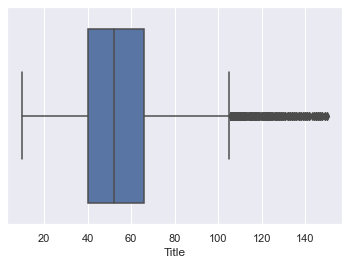

In [28]:
#Affichage avec un boxplot :
tmp = df.Title.str.len()
sns.boxplot(tmp)

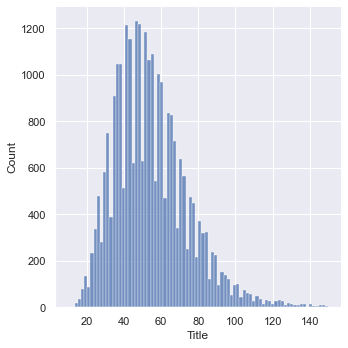

In [29]:
#Affichage sous forme de Displot :
sns.displot(tmp)

In [30]:
#Nous Stockons les infos sur la longueur du titre dans la colonne _len_title :
df["_len_txt"] = tmp

### <font color = grey>4.3. Analyse Multi-variée</font>

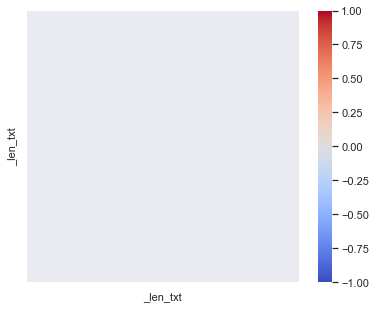

In [31]:
# Matrice de corrélation
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fog, ax = plt.subplots(1, 1, figsize = (7, 5))
ax = sns.heatmap(corr, mask = mask, vmin = -1, vmax = 1, cmap = "coolwarm", annot = True, fmt = ".2f", square = True)

Non utile dans notre cas car nous n'avons pas de variable Numérique !

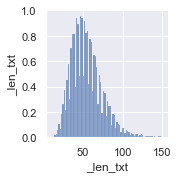

In [32]:
sns.pairplot(df)

Non utile dans notre cas car nous n'avons pas de variable Numérique

In [33]:
#Affichages des 10 plus court titres
df.sort_values("_len_txt").head(5)

,Title,Body,Tags,_len_txt
514,TFS vs SVN,<p>I am about to start a project (.NET) and ne...,<.net><svn><version-control><tfs><configuratio...,10
3817,Reading DataSet,<p>How do I read data from a DataSet in WPF? I...,<c#><.net><wpf><ado.net><dataset>,15
20429,nᵗʰ ugly number,"<p>Numbers whose only prime factors are 2, 3, ...",<algorithm><math><primes><factors><hamming-num...,15
17704,Merge PDF files,"<p>Is it possible, using Python, to merge sepa...",<python><pdf><file-io><pypdf2><pypdf>,15
25992,The Pause monad,"<p>Monads can do many amazing, crazy things. T...",<haskell><monads><coroutine><monad-transformer...,15


In [34]:
#Affichages des 10 plus long titre
df.sort_values("_len_txt").tail(5)

,Title,Body,Tags,_len_txt
27476,"Your project does not reference "".NETFramework...",<p>I can't run my unit tests.</p>\n\n<p>I have...,<c#><unit-testing><mstest><csproj><.net-framew...,149
4344,InvalidArgumentException: Message: invalid arg...,<p>When I am trying to use <code>--user-data-d...,<python><selenium><google-chrome><selenium-chr...,149
19066,MediaSessionCompat:Targeting S+ (version 31 an...,<p>I'm trying to update my application to Andr...,<java><android><android-studio><kotlin><androi...,149
27551,Selenium: WebDriverException:Chrome failed to ...,<p>Recently I switched computers and since the...,<python><selenium><google-chrome><selenium-web...,150
24888,This app is not authorized to use Firebase Aut...,"<p>Firebase auth was working fine, the debug b...",<java><android><firebase><android-studio><fire...,150


Nous pouvons nous séparer de la colonne "len_txt" qui a été utile pour l'analyse.

In [35]:
df.drop(columns = "_len_txt", inplace = True)
df.head()

,Title,Body,Tags
0,"Differences between declare, typeset and local...","<p>When typing variables in Bash, what is the ...",<bash><shell><variables><scope><declare>
1,Dealing with PHP server and MySQL server in di...,<p>For those of us who use standard shared hos...,<php><mysql><datetime><date><timezone>
2,Difference between async/await and ES6 yield w...,<p>I was just reading this fantastic article «...,<javascript><node.js><ecmascript-6><generator>...
3,Loading System.ServiceModel configuration sect...,"<p>Using C# .NET 3.5 and WCF, I'm trying to wr...",<c#><.net><xml><wcf><configurationmanager>
4,XML Serialization and Inherited Types,"<p>Following on from my <a href=""https://stack...",<c#><xml><inheritance><serialization><xml-seri...


In [36]:
#Enregistrement en csv :
df.to_csv("cleaned/df_cleaned.csv", index = False)

### <font color = grey>4.4. Exploration du Corpus et des Documents</font>

Création de la fonction "Print N documents au hasard"

In [37]:
def print_sample(sub_df, n_samp = 10) :
    """Visualisation n_samp documents du Corpus"""
    
    samp = sub_df.sample(n_samp)
    
    for idx, ser in samp.iterrows() :
        print(ser["Title"] + "..." + "\n\n")

In [38]:
print_sample(df, n_samp = 10)

How do I get a YouTube video thumbnail from the YouTube API?...


Select rows in pandas MultiIndex DataFrame...


Star-Schema Design...


Unicode, UTF, ASCII, ANSI format differences...


msdeploy (Web Deploy) failing with 401 auth issues...


Python Pandas - Missing required dependencies ['numpy'] 1...


Simple, hassle-free, zero-boilerplate serialization in Scala/Java similar to Python's Pickle?...


Plot dynamically changing graph using matplotlib in Jupyter Notebook...


How do you cast a List of supertypes to a List of subtypes?...


How to open Safari from a WebApp in iOS 7...




--------
--------

# <font color = green>Partie 2 : Text Processing</font>

## <font color = purple>1. Préliminaires</font>

### <font color = grey>1.1. Contexte</font>

L'objectif de cette partie est :
- d'Explorer les principales transormations
- d'Analyser le corpus
- d'Essayer différents transofrmations
- de Réduire la dimensionnalité de nos données (réduction du nb de tokens sur notre corpus)

### <font color = grey>1.2. Librairies</font>

In [39]:
# builtin :
import os, sys, time, random

# data :
import pandas as pd
import numpy as np

# NLP :
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# Spacy :
import spacy

# Vizualisation :
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image #Pillow

# Pandarallel : Permet d'executer du code sur un nombre choisi de cpu
from pandarallel import pandarallel 

### <font color = grey>1.3. Librairies externes et Options</font>

Afin d'utiliser certaines fonctionalitées nltk il faut télécharger des librairies externes (Asset).
</br>ex: "stopwords" contient une liste des stop words anglais.

In [40]:
#téléchargement :

nltk.download("omw-1.4")
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("words")

[nltk_data] Downloading package omw-1.4 to C:\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to C:\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [41]:
# pandarallel otpions :

pandarallel.initialize(progress_bar = True,
                      nb_workers = 6 #Définir ici le nb de cpu,
                      #verbose = 1
                      )

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [42]:
# Initialisation sns :
sns.set()

### <font color = grey>1.4. Chargement des données</font>

In [43]:
# chemin d'accès au fichier :
data = "./cleaned/"
os.listdir(data)

['.ipynb_checkpoints',
 'df_cleaned.csv',
 'final_df.csv',
 'min_10_words.csv',
 'min_5_words.csv',
 'tokens_list.csv',
 'unique_words.csv']

In [44]:
# Chargement du dataframe :
fn = data + "df_cleaned.csv"
df = pd.read_csv(fn)
df.head()

,Title,Body,Tags
0,"Differences between declare, typeset and local...","<p>When typing variables in Bash, what is the ...",<bash><shell><variables><scope><declare>
1,Dealing with PHP server and MySQL server in di...,<p>For those of us who use standard shared hos...,<php><mysql><datetime><date><timezone>
2,Difference between async/await and ES6 yield w...,<p>I was just reading this fantastic article «...,<javascript><node.js><ecmascript-6><generator>...
3,Loading System.ServiceModel configuration sect...,"<p>Using C# .NET 3.5 and WCF, I'm trying to wr...",<c#><.net><xml><wcf><configurationmanager>
4,XML Serialization and Inherited Types,"<p>Following on from my <a href=""https://stack...",<c#><xml><inheritance><serialization><xml-seri...


In [45]:
#Taille du dataframe
df.shape

(27655, 3)

In [46]:
#En cas de problème de perf, creation du sample
# df = df.sample(frac = 0.3)

------------

## <font color = purple>2. Travail sur un document spécifique</font>

Création d'une fonction pour selectionner aléatoirement un Document de notre corpus.

In [47]:
def get_random_doc(sub_df) :
    doc = sub_df.Title.sample(1) #prendre 1 individu sample(1)
    doc = doc.values[0] #Valeur de la colonne 0 (Title dans notre cas)
    return doc

In [48]:
doc = get_random_doc(df)
doc

'Missing CrudRepository#findOne method'

### <font color = grey>2.1. Application de lower() (mise en minuscule)</font>

In [49]:
# mettre en minuscule tout le Texte
doc = doc.lower()
doc

'missing crudrepository#findone method'

### <font color = grey>2.2. Tokenization</font>

Création d'une fonction d'affichage des informations d'une liste de tokens :

In [50]:
def display_tokens_info(tokens) :
    """affiche les informations tokens d'un corpus"""
    
    print(f"nb tokens {len(tokens)}, nb tokens uniques {len(set(tokens))}")
    print(tokens[:30])

In [51]:
# Méthode tokenisation 1 : Word_tokenize
tokens = word_tokenize(doc)
display_tokens_info(tokens)

nb tokens 5, nb tokens uniques 5
['missing', 'crudrepository', '#', 'findone', 'method']


In [52]:
# Méthode tokenisation 2 : wordpunct
tokens = wordpunct_tokenize(doc)
display_tokens_info(tokens)

nb tokens 5, nb tokens uniques 5
['missing', 'crudrepository', '#', 'findone', 'method']


In [53]:
# Méthode tokenisation 3 :  regexp 
tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(doc)
display_tokens_info(tokens)

nb tokens 4, nb tokens uniques 4
['missing', 'crudrepository', 'findone', 'method']


<font color = red>TESTER D'AUTRES TOKENIZER</font>

### <font color = grey>2.3. Stopwords</font>

Stopwords : liste de mot générique (ex en fr : conjonction de coordination mais, ou, est, donc etc..).
</br>Nous les supprimmons de notre liste de token.

In [54]:
# liste des stop words nltk
stop_words = set(stopwords.words("english"))
print(stop_words)

{'all', 'our', 'below', 'y', 'own', "hadn't", 're', 'here', 'between', "couldn't", 'been', 'why', 'while', 'mightn', 'having', 'his', 'who', "wouldn't", 'until', 'haven', 'if', 'only', 'what', 'into', 'out', 'ain', 'hasn', 'do', 'few', 'no', 'nor', 'then', 'same', 'which', 'that', 'myself', 'not', 'doesn', 'this', "you're", 'whom', "you'll", 'up', 'over', 'shan', 'won', "hasn't", 'them', "mightn't", 'off', 'for', 'theirs', "she's", 'have', 'he', 've', 'through', 'yourselves', 'at', 'themselves', 'too', 'further', 'once', "you've", 'o', 'after', 'weren', 'some', 'll', 'had', 'they', 'don', 'am', 'now', "you'd", 'be', 'most', 'but', 'during', "doesn't", 'needn', 'my', 'hers', 'ourselves', 'the', 'herself', 'because', 'ours', 'does', 'other', 'very', 'about', 'when', "shan't", "didn't", 'me', 'ma', 'both', 'before', 'any', 'she', 'just', 'you', 'yourself', 'were', 'by', "weren't", "wasn't", 'are', 'under', 'their', 'as', 't', 'of', 'isn', 'and', 'm', "aren't", 'doing', 'a', 'didn', 'these

In [55]:
#filtre, on enlève les stop words de notre liste de tokens
tokens = [w for w in tokens if w not in stop_words]
display_tokens_info(tokens)

nb tokens 4, nb tokens uniques 4
['missing', 'crudrepository', 'findone', 'method']


### <font color = grey>2.4. Première fonction de cleaning</font>

L'objectif de cette fonction est d'appliquer les différentes transformations précédente sur notre document :
</br>(1) Mise en minuscule du Document.
</br>(2) Tokenisation avec Regexp (changer la tokenisation au besoin)
</br>(3) Suppression des StopWords

In [56]:
def process_text_1(doc, rejoin = False) :
    """première fonction de texte procressing"""
    
    # Mise en minuscule du text (Lower) et suppressions des espace avant et après le mot (strip) :
    doc =  doc.lower().strip()
    
    # tokenisation Regexp
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    # Suppression des stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    # si Rejoin = True : Renvoi un texte avec les tokens séparer par un espace
    # si Rejoin = False (default value) : Renvoi la liste des tokens
    if rejoin :
        return " ".join(cleaned_tokens_list)
        
    return cleaned_tokens_list

In [57]:
#Appliquons notre fonction
tokens = process_text_1(doc)
display_tokens_info(tokens)

nb tokens 4, nb tokens uniques 4
['missing', 'crudrepository', 'findone', 'method']


--------

## <font color = Purple>3. Travail sur le corpus en entier</font>

### <font color = grey>3.1. Construction de "raw corpus"</font>

Le premier objectif est de reconstituer notre corpus et de joindre l'ensemble des documents entre eux.
</br>En vulgarisant : On transforme un ensemble de document (notre corpus) en un gros document raw_corpus qui contient l'intégralité des mots de chaque document.

In [58]:
#jointure de tous les documents de notre corpus
raw_corpus = "".join(df.Title.values)
raw_corpus[:1000] #Affichage des 1000 premier Caractères

'Differences between declare, typeset and local variable in BashDealing with PHP server and MySQL server in different time zonesDifference between async/await and ES6 yield with generatorsLoading System.ServiceModel configuration section using ConfigurationManagerXML Serialization and Inherited TypesMyISAM versus InnoDBSpecifying a mySQL ENUM in a Django modelRecommended SQL database design for tags or taggingWhat is the difference between #include <filename> and #include "filename"?.NET - Get protocol, host, and portHow Do You Communicate Service Layer Messages/Errors to Higher Layers Using MVP?List<BusinessObject> or BusinessObjectCollection?Programmatically encrypting a config-file in .NETjQuery AJAX vs. UpdatePanelWhy does the JVM require warmup?How do I size a UITextView to its content?Batch file to delete files older than N daysWhat is the real overhead of try/catch in C#?Cross-platform space remaining on volume using pythonWhat work has been done on cross-platform mobile develop

In [59]:
#Nombre de charactère de Raw_corpus
len(raw_corpus)

1514139

In [60]:
#Utilisation de notre première fonction de cleaning / obtention des tokens :
corpus = process_text_1(raw_corpus)
display_tokens_info(corpus)

nb tokens 159360, nb tokens uniques 26348
['differences', 'declare', 'typeset', 'local', 'variable', 'bashdealing', 'php', 'server', 'mysql', 'server', 'different', 'time', 'zonesdifference', 'async', 'await', 'es6', 'yield', 'generatorsloading', 'system', 'servicemodel', 'configuration', 'section', 'using', 'configurationmanagerxml', 'serialization', 'inherited', 'typesmyisam', 'versus', 'innodbspecifying', 'mysql']


In [61]:
#fréquence d'apparation dans le corpus
tmp = pd.Series(corpus).value_counts()
tmp

using                        1955
c                            1298
use                          1220
vs                           1082
file                          919
                             ... 
observed                        1
lengthsa                        1
requestnsattributedstring       1
phpshow                         1
benchmarkingerrors              1
Length: 26348, dtype: int64

In [62]:
#visualization ATTENTION PREND BEAUCOUP DE TEMPS
#sns.barplot(x=tmp.index, y=tmp.values)

In [63]:
#les 30 tokens les plus présents
tmp.head(30)

using         1955
c             1298
use           1220
vs            1082
file           919
android        766
python         751
data           749
net            713
get            707
java           684
ios            593
string         566
error          548
way            540
app            515
difference     510
multiple       484
create         456
image          454
web            447
code           421
windows        418
text           415
server         413
javascript     412
spring         411
without        410
set            396
2              390
dtype: int64

In [64]:
#les 30 tokens les moins présents
tmp.tail(30)

myapp                        1
endiannessunable             1
5javascript                  1
describemismatch             1
nosuchmethoderror            1
usergetting                  1
lambdasswitching             1
visitation                   1
nsnotification               1
uploadkvo                    1
networksbootstrap            1
storagecrm                   1
symfonyenabling              1
jqueryoverride               1
premature                    1
authenticationis             1
constraintlayoutbinding      1
codesusing                   1
complexities                 1
integrationdetermining       1
functionunity3d              1
editorefficiency             1
micromultiple                1
washow                       1
unobserved                   1
observed                     1
lengthsa                     1
requestnsattributedstring    1
phpshow                      1
benchmarkingerrors           1
dtype: int64

In [65]:
tmp.describe()

count    26348.000000
mean         6.048277
std         31.857205
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       1955.000000
dtype: float64

75% des tokens sont présents au moins 2 fois avec un max à 1955 de fréquence d'apparation

In [66]:
#sns.displot(tmp) #gourmand

In [67]:
#sns.boxplot(tmp) #gourmand

### <font color = grey>3.2. Liste des tokens peu présent dans le corpus</font>

Unique words :

In [68]:
# liste des unique words (mot présent 1 fois dans le corpus)
tmp = pd.Series(corpus).value_counts()
list_unique_words = tmp[tmp == 1]
list_unique_words[:30]

rpostgresqlhibernate        1
richtext                    1
optionpython                1
androidfatal                1
dies                        1
uitableviewrowaction        1
ideahow                     1
__getattribute__how         1
jpagetting                  1
ftpwebrequestsqlbulkcopy    1
__getattr__                 1
applicationswhat            1
tuplecan                    1
jaxp                        1
multithreadingauto          1
localizable                 1
databaseactivity            1
connectionwhat              1
getusermedia                1
javascriptdisplaying        1
matlabjavascript            1
messagepack                 1
androidcllocation           1
wordscoredata               1
usageredis                  1
pngs                        1
keyspace                    1
stackexchange               1
redisissues                 1
acc                         1
dtype: int64

In [69]:
len(list_unique_words)

18285

In [70]:
#sauvegarde des unique words
tmp = pd.DataFrame({"words" : list_unique_words})
tmp.to_csv("cleaned/unique_words.csv", index = False)

Words appears at least 5 time :

In [71]:
#idem pour une fréquence d'apparation de moins de 5 fois (ou égale, non stric)
tmp = pd.Series(corpus).value_counts()
list_min_5_words = tmp[tmp <= 5]
list_min_5_words[:30]

512             5
entitlements    5
moment          5
scenario        5
barrier         5
suffix          5
printer         5
fold            5
crashed         5
refer           5
jacoco          5
serviceis       5
saml            5
mechanism       5
twisted         5
castle          5
gevent          5
firing          5
playback        5
volley          5
javawhat        5
concept         5
instanceof      5
recognizing     5
caret           5
ordereddict     5
mathematical    5
declarative     5
initializing    5
emulatorhow     5
dtype: int64

In [72]:
len(list_min_5_words)

22930

In [73]:
#sauvegarde
list_min_5_words = list(list_min_5_words.index)
tmp = pd.DataFrame({"words" : list_min_5_words})
tmp.to_csv("cleaned/min_5_words.csv", index = False)

Words appears at least 10 time :

In [74]:
#idem pour 10 fois
tmp = pd.Series(corpus).value_counts()
list_min_10_words = tmp[tmp <= 10]
list_min_10_words[:30]

multidimensional    10
develop             10
ipa                 10
scripting           10
conflict            10
glass               10
trouble             10
utf8                10
nosql               10
bars                10
swap                10
redundant           10
counting            10
crashing            10
gunicorn            10
today               10
rid                 10
suitable            10
requirejs           10
charts              10
direction           10
methodhow           10
afnetworking        10
upper               10
2how                10
designer            10
footer              10
interpolation       10
profiling           10
di                  10
dtype: int64

In [75]:
len(list_min_10_words)

24190

In [76]:
#sauvegarde
list_min_10_words = list(list_min_10_words.index)
tmp = pd.DataFrame({"words" : list_min_10_words})
tmp.to_csv("cleaned/min_10_words.csv", index = False)

### <font color = grey>3.3. 2ème fonction de Cleaning</font>

L'objectif est d'améliorer notre première fonction en lui ajoutant :
</br>(1) un filtre sur les mots rares (liste de mot rare à fournir)
</br>(2) un filtre sur la longueur des mots "min_len_word"
</br>(3) le paramètre force_is_alpha afin de ne prendre que les charactères alpahabétiques.

In [77]:
def process_text_2(doc,
                  rejoin = False,
                  list_rare_words=None,
                  min_len_word = 3,
                  force_is_alpha = True):
    """cf process_text_1 but with list_unique_words, min_len_word, and force_is_alpha
    
    positional arguments :
    ------------------------
    doc : str : the document (aka a text in str format) to process
    
    optionnal args :
    ------------------------
    rejoin : bool : if True return a string else return the list of tokens
    list_rare_words : list : a list of rare words to excluse
    min_len_words : int : the minimum lenght of words to not excluse
    force_is_alpha : int : if 1, exclude all tokens with a numéric character
    
    return :
    ------------------------
    a string (if rejoin is True) or a list of tokens
    """
    
    #list unique_words
    if list_rare_words is None:
        list_rare_words = []
        
    #lower
    doc = doc.lower().strip()
    
    #tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    #Classic stopwords
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    
    ###########################################
    ###########################################
    
    #non rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]
    
    #no more len words
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]
    
    #only alpha chars
    if force_is_alpha :
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else :
        alpha_tokens = more_than_N
    
    
    ##########################################
    ##########################################
    
    #manage return type
    if rejoin :
        return " ".join(alpha_tokens)
    
    return alpha_tokens

In [78]:
#Résultat suite à la fonction n°1
display_tokens_info(corpus)

nb tokens 159360, nb tokens uniques 26348
['differences', 'declare', 'typeset', 'local', 'variable', 'bashdealing', 'php', 'server', 'mysql', 'server', 'different', 'time', 'zonesdifference', 'async', 'await', 'es6', 'yield', 'generatorsloading', 'system', 'servicemodel', 'configuration', 'section', 'using', 'configurationmanagerxml', 'serialization', 'inherited', 'typesmyisam', 'versus', 'innodbspecifying', 'mysql']


In [79]:
#Application de notre nouvelle fonction
corpus = process_text_2(raw_corpus,
                        list_rare_words=list_unique_words,
                       rejoin = False)
display_tokens_info(corpus)

nb tokens 131082, nb tokens uniques 7510
['differences', 'declare', 'local', 'variable', 'php', 'server', 'mysql', 'server', 'different', 'time', 'async', 'await', 'yield', 'system', 'configuration', 'section', 'using', 'serialization', 'inherited', 'versus', 'mysql', 'enum', 'django', 'sql', 'database', 'design', 'tags', 'difference', 'include', 'filename']


<font color = red> Nous pouvons utiliser les listes : list_min_5_words et list_min_10_words pour comparer les résultats !</font>

In [80]:
#fréquence d'apparation dans le corpus
tmp = pd.Series(corpus).value_counts()
tmp

using              1955
use                1220
file                919
android             766
python              751
                   ... 
perhaps               2
unauthorizedhow       2
centoshow             2
discard               2
solana                2
Length: 7510, dtype: int64

### <font color = grey>3.4. Racinisation (Stemming) & Lemmatisation</font>

Le processus de « lemmatisation » consiste à représenter les mots (ou « lemmes ») sous leur forme canonique. 
</br>Par exemple pour un verbe, ce sera son infinitif. Pour un nom, son masculin singulier. 
</br>L'idée étant encore une fois de ne conserver que le sens des mots utilisés dans le corpus.
</br></br>Si l'on prend un exemple :  "Bonjour, je suis un texte d'exemple pour le cours d'Openclassrooms. Soyez attentifs à ce cours !"
</br>L'idéal serait d'extraire les lemmes suivants : « bonjour, être, texte, exemple, cours, openclassrooms, être, attentif, cours ». Dans le processus de lemmatisation, on transforme donc « suis » en « être»  et « attentifs » en « attentif ».
</br></br></br>Il existe un autre processus qui exerce une fonction similaire qui s'appelle la racinisation(ou stemming en anglais). 
</br>Cela consiste à ne conserver que la racine des mots étudiés. L'idée étant de supprimer les suffixes, préfixes et autres des mots afin de ne conserver que leur origine. 
</br>C'est un procédé plus simple que la lemmatisation et plus rapide à effectuer puisqu'on tronque les mots essentiellement contrairement à la lemmatisation qui nécessite d'utiliser un dictionnaire.

### <font color = red>le lemmatizer et stemmizer de nltk renvoi a peu de chose prêt le meme resultat ==> voir avec SPACY</font>

In [81]:
doc = "I have 3 dogs, they was all black. Now they are all white but one of my dog is my favourite"

In [82]:
tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(doc.lower())
print(tokens)

['i', 'have', '3', 'dogs', 'they', 'was', 'all', 'black', 'now', 'they', 'are', 'all', 'white', 'but', 'one', 'of', 'my', 'dog', 'is', 'my', 'favourite']


In [83]:
trans = PorterStemmer()
trans_text = [trans.stem(i) for i in tokens]
print(trans_text)

['i', 'have', '3', 'dog', 'they', 'wa', 'all', 'black', 'now', 'they', 'are', 'all', 'white', 'but', 'one', 'of', 'my', 'dog', 'is', 'my', 'favourit']


In [84]:
trans = WordNetLemmatizer() #se base sur la librairie externe Wordnet téléchargé précédemment)
trans_text = [trans.lemmatize(i) for i in tokens]
print(trans_text)

['i', 'have', '3', 'dog', 'they', 'wa', 'all', 'black', 'now', 'they', 'are', 'all', 'white', 'but', 'one', 'of', 'my', 'dog', 'is', 'my', 'favourite']


### <font color = grey>3.5. 3eme fonction de nettoyage</font>

L'objectif est d'améliorer notre seconde fonction en lui ajoutant un paramètre permettant d'utiliser la Racinisation (Stemming) ou Lemmatisation sur nos tokens

In [85]:
def process_text_3(doc,
                  rejoin = False,
                   lemm_or_stemm = "stem",
                  list_rare_words=None,
                  min_len_word = 3,
                  force_is_alpha = True):
    """cf process_text_2 but with lemm_or_stemm
    
    positional arguments :
    ------------------------
    doc : str : the document (aka a text in str format) to process
    
    opt args :
    ------------------------
    rejoin : bool : if True return a string else return the list of tokens
    lemm_or_stemm : str : if lem do lemmatize else stemmentize
    list_rare_words : list : a list of rare words to excluse
    min_len_words : int : the minimum lenght of words to not excluse
    force_is_alpha : int : if 1, exclude all tokens with na numéric character
    
    return :
    ------------------------
    a string (if rejoin is True) or a list of tokens
    """
    
    #list unqiue_words
    if list_rare_words is None:
        list_rare_words = []
    
    #lower
    doc = doc.lower().strip()
    
    #tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    #Classic stopwords
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    
    ###########################################
    ###########################################
    
    #no rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]
    
    #no more len words
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]
    
    #only alpha chars
    if force_is_alpha :
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else :
        alpha_tokens = more_than_N
    
    
    ##########################################
    ##########################################

    #stem or lem
    if lemm_or_stemm =="len" :
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_tokens]
    else :
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_tokens]
    ##########################################
    ##########################################
    #manage return type
    if rejoin :
        return " ".join(trans_text)
    
    return trans_text

In [86]:
#Application de notre 3 ème fonction :
corpus = process_text_3(raw_corpus, rejoin = False, list_rare_words = list_unique_words)
display_tokens_info(corpus)

nb tokens 131082, nb tokens uniques 5623
['differ', 'declar', 'local', 'variabl', 'php', 'server', 'mysql', 'server', 'differ', 'time', 'async', 'await', 'yield', 'system', 'configur', 'section', 'use', 'serial', 'inherit', 'versu', 'mysql', 'enum', 'django', 'sql', 'databas', 'design', 'tag', 'differ', 'includ', 'filenam']


In [87]:
#fréquence d'apparation dans le corpus
tmp = pd.Series(corpus).value_counts()
tmp

use         3344
file        1290
get          844
differ       834
android      766
            ... 
looper         2
rep            2
gettext        2
htmlwhat       2
solana         2
Length: 5623, dtype: int64

On remarque que use et using ne forme maintenant qu'un seul et même token "use"

### <font color = grey>3.6. Only English Words</font>

L'objectif est de ne conserver que les mots Anglais (pour eviter les erreur de frappe par exemple) en utilisant la librairies externe <b>nltk words</b> (liste des mots du dictionnaire).
</br>Nous allons appliquer quelques transfmoration à cette série :

In [88]:
#Affichage d'un echantillon de 30
pd.Series(words.words()).sample(30)

109547            machin
99994            Jewship
76460         gentlemens
196678       synchoresis
25081           botryose
64110       equipartisan
207108         tridactyl
74742          galactite
138390           panting
115119          metewand
118753     monogonoporic
201562    Theopaschitism
18671            barnard
193040        subuliform
215006        undialyzed
113472       melioristic
182819          slashing
220691      unpoisonable
40293       compensatory
179771            sharny
228603         victualry
111058             mania
103129           Kwannon
192057       subflooring
55624           disproof
21181          berrugate
189057          steenboc
113196        Megarhinus
19935             bedrid
69400      feuilletonism
dtype: object

Nombre de mot dans le dictionnaire :

In [89]:
len(set(words.words()))

235892

In [90]:
#mettre le texte en minuscule
eng_words = [i.lower() for i in words.words()]
eng_words[:30]

['a',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'aani',
 'aardvark',
 'aardwolf',
 'aaron',
 'aaronic',
 'aaronical',
 'aaronite',
 'aaronitic',
 'aaru',
 'ab',
 'aba',
 'ababdeh',
 'ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally']

In [91]:
len(set(eng_words))

234377

In [92]:
#Stemmer pour les mot (afin de pourovir l'utiliser dans notre fonction (sinon les mots ne correpsondent pas)
ps = PorterStemmer()
eng_words_stem = [ps.stem(i) for i in eng_words]
display_tokens_info(eng_words_stem)

nb tokens 236736, nb tokens uniques 178311
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaron', 'aaron', 'aaronit', 'aaronit', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abac', 'abacay', 'abacin', 'abacin', 'abaciscu', 'abacist', 'aback', 'abactin', 'abactin']


In [93]:
len(set(eng_words_stem))

178311

In [94]:
#lemmatizer pour les mot (afin de pourovir l'utiliser dans notre fonction (sinon les mots ne correpsondent pas)
lm = WordNetLemmatizer()
eng_words_lem = [lm.lemmatize(i) for i in eng_words]
display_tokens_info(eng_words_lem)

nb tokens 236736, nb tokens uniques 233450
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaronic', 'aaronical', 'aaronite', 'aaronitic', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abacate', 'abacay', 'abacinate', 'abacination', 'abaciscus', 'abacist', 'aback', 'abactinal', 'abactinally']


In [95]:
len(set(eng_words_lem))

233450

### <font color = grey>3.7. 4ème fonction de nettoyage</font>

L'objectif est d'améliorer notre troisième fonction en lui ajoutant un paramètre permettant de ne conserver que les mots présents dans le dictionnaire.
Attention, il faut traiter les mots avec la même metohde (rascinisation ou lemmatisation) que celle souhaitée !

<font color = red>Attention nous avons des acronymes dans notre corpus.
</br>En effet, nous travaillons sur un corpus présentant des éléments relatifs à l'informatique.
</br>Utiliser le dictionnaire n'est pas judicieux.</font>

In [96]:
def process_text_4(doc,
                  rejoin = False,
                   lemm_or_stemm = "stem",
                  list_rare_words=None,
                  min_len_word = 3,
                  force_is_alpha = True,
                  eng_words = None):
    """cf process_text_3 but with selection of only english words
    
    positional arguments :
    ------------------------
    doc : str : the document (aka a text in str format) to process
    
    opt args :
    ------------------------
    rejoin : bool : if True return a string else return the list of tokens
    lemm_or_stemm : str : if lem do lemmatize else stemmentize
    list_rare_words : list : a list of rare words to excluse
    min_len_words : int : the minimum lenght of words to not excluse
    force_is_alpha : int : if 1, exclude all tokens with na numéric character
    
    return :
    ------------------------
    a string (if rejoin is True) or a list of tokens
    """
    
    #list unqiue_words
    if list_rare_words is None:
        list_rare_words = []
    
    #lower
    doc = doc.lower().strip()
    
    #tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    #Classic stopwords
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    
    ###########################################
    ###########################################
    
    #no rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]
    
    #no more len words
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]
    
    #only alpha chars
    if force_is_alpha :
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else :
        alpha_tokens = more_than_N
    
    
    ##########################################
    ##########################################

    #stem or lem
    if lemm_or_stemm =="len" :
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_tokens]
    else :
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_tokens]
    ##########################################
    ##########################################
    
    #in english
    if eng_words :
        engl_text = [i for i in trans_text if i in eng_words]
    else:
        engl_text = trans_text
        
    ##########################################
    ##########################################    
    #manage return type
    if rejoin :
        return " ".join(engl_text)
    
    return engl_text

### <font color = orange>3.7.bis. Vérification des élements filtrés par english Words</font><font color = red> (GOURMAND en ressource !!)</font>

In [97]:
corpus_eng_words_only = process_text_4(raw_corpus,
                       rejoin = False,
                       list_rare_words = list_unique_words,
                       eng_words = eng_words_stem)
display_tokens_info(corpus_eng_words_only)

nb tokens 105850, nb tokens uniques 2701
['differ', 'declar', 'local', 'variabl', 'server', 'server', 'differ', 'time', 'await', 'yield', 'system', 'configur', 'section', 'use', 'serial', 'inherit', 'versu', 'enum', 'design', 'tag', 'differ', 'includ', 'includ', 'net', 'get', 'protocol', 'host', 'commun', 'servic', 'layer']


In [98]:
tmp = pd.Series(corpus_eng_words_only).value_counts()
tmp

use         3344
file        1290
get          844
differ       834
android      766
            ... 
cyclic         2
bert           2
sanit          2
orthogon       2
lab            2
Length: 2701, dtype: int64

In [99]:
#vizualisation gourmande
#sns.barplot(tmp.index, tmp.values)

Check des mots filtré par engl words :

In [100]:
vérification = [w for w in corpus if w not in corpus_eng_words_only]

In [101]:
len(set(vérification))

2922

In [102]:
tmp = pd.Series(vérification).value_counts()
tmp

app            571
javascript     412
json           350
http           341
sql            338
              ... 
jellybean        2
conflicthow      2
rdf              2
octre            2
solana           2
Length: 2922, dtype: int64

Nous perdons bien des informations importantes en appliquant le filtre english words. Nous ne l'utiliseorns pas (tel quel) dans notre projet.

### <font color = grey>3.8. Wordcloud</font>

In [103]:
def use_wordcloud(corpus):
    wordcloud = WordCloud(background_color = "white",
                     stopwords = [],
                     max_words = 50).generate(" ".join(corpus))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

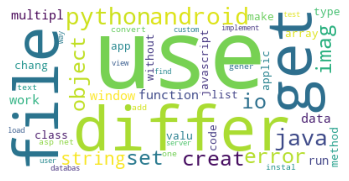

In [104]:
use_wordcloud(corpus)

### <font color = grey>3.9. 4ème fonction de nettoyage</font>

L'objectif est d'améliorer notre quatrième fonction en lui ajoutant un paramètre permettant de filtrer les tokens depuis une liste donnée extra_words.
</br>L'objectif étant d'exclure de notre liste de tokens des mots en particuliers.

In [105]:
def process_text_5(doc,
                  rejoin = False,
                   lemm_or_stemm = "stem",
                  list_rare_words=None,
                  min_len_word = 3,
                  force_is_alpha = True,
                  eng_words = None,
                  extra_words = None):
    """cf process_text_4 but exclude extra list
    
    positional arguments :
    ------------------------
    doc : str : the document (aka a text in str format) to process
    
    opt args :
    ------------------------
    rejoin : bool : if True return a string else return the list of tokens
    lemm_or_stemm : str : if lem do lemmatize else stemmentize
    list_rare_words : list : a list of rare words to excluse
    min_len_words : int : the minimum lenght of words to not excluse
    force_is_alpha : int : if 1, exclude all tokens with na numéric character
    
    return :
    ------------------------
    a string (if rejoin is True) or a list of tokens
    """
    
    #list unqiue_words
    if list_rare_words is None:
        list_rare_words = []
    
    #lower
    doc = doc.lower().strip()
    
    #tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    #Classic stopwords
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    
    ###########################################
    ###########################################
    
    #no rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]
    
    #no more len words
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]
    
    #only alpha chars
    if force_is_alpha :
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else :
        alpha_tokens = more_than_N
    
    
    ##########################################
    ##########################################

    #stem or lem
    if lemm_or_stemm =="len" :
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_tokens]
    else :
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_tokens]
    ##########################################
    ##########################################
    
    #in english (mettre avant pour évoter le traitement du dictionnaire englais)
    if eng_words :
        engl_text = [i for i in trans_text if i in eng_words]
    else:
        engl_text = trans_text
        
    ##########################################
    ##########################################
    
    #drop extra_words tokens
    if extra_words is None :
        final = engl_text
    else :
        final = [w for w in engl_text if w not in extra_words]
    
    ##########################################
    ##########################################
    
    #manage return type
    if rejoin :
        return " ".join(final)
    
    return final

In [106]:
#Création d'une liste de extrawords :
words_to_exclude = ["use"]

In [107]:
#Application de notre 5 ème fonction :
corpus = process_text_5(raw_corpus, rejoin = False, list_rare_words = list_unique_words, extra_words = words_to_exclude)
display_tokens_info(corpus)

nb tokens 127738, nb tokens uniques 5622
['differ', 'declar', 'local', 'variabl', 'php', 'server', 'mysql', 'server', 'differ', 'time', 'async', 'await', 'yield', 'system', 'configur', 'section', 'serial', 'inherit', 'versu', 'mysql', 'enum', 'django', 'sql', 'databas', 'design', 'tag', 'differ', 'includ', 'filenam', 'includ']


In [108]:
#fréquence d'apparation dans le corpus
tmp = pd.Series(corpus).value_counts()
tmp

file            1290
get              844
differ           834
android          766
python           754
                ... 
pythonwhen         2
iboutlet           2
listenershow       2
dataflow           2
solana             2
Length: 5622, dtype: int64

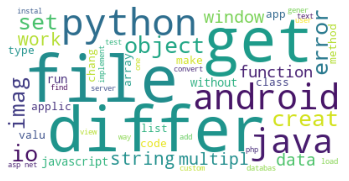

In [109]:
#word cloud :
use_wordcloud(corpus)

---------

## <font color = red>4. Divide the CORPUS (A RENAME)</font>

### 4.1. Gestion de la variable de sortie tags

Transofmartion des tags en text avec beatifulsoup

application des fonctions words !!! avec traitmeent des mots rare etc.. avant

CREATION DUNC FOCNTION DE GESTION DES TAGS !!

--------

## <font color = Purple>5. Fonction Final de Cleaning</font>

In [110]:
def final_clean(doc) :
    new_doc = process_text_5(doc, rejoin = True, list_rare_words = list_unique_words)
    return new_doc

In [111]:
final_clean(raw_corpus)

'differ declar local variabl php server mysql server differ time async await yield system configur section use serial inherit versu mysql enum django sql databas design tag differ includ filenam includ filenam net get protocol host porthow commun servic layer messag error higher layer use mvp list programmat encrypt config file ajax jvm requir warmup size uitextview content batch file delet file older real overhead tri catch cross platform space remain volum use pythonwhat work done cross platform mobil develop file nodej javascript oop nodej cakephp acl databas setup structur select distinct multipl column use class struct good librari deal protocol net differ old style new style class python best way pars html kill session connect oracl databas convert pdf file windowswhat exampl liskov substitut principl interfac base creat virtual drive add timeout consol readlin sync sublim text set use dropbox creat new gui wpf prefer choic window form duplic whole line emac use except specifi us

In [112]:
#Ajoutons une colonne clean_title : essayer avec df.apply(func) (sans //lélisation)
df["clean_title"] = df.Title.apply(final_clean)

In [113]:
df.head(10)

,Title,Body,Tags,clean_title
0,"Differences between declare, typeset and local...","<p>When typing variables in Bash, what is the ...",<bash><shell><variables><scope><declare>,differ declar local variabl bash
1,Dealing with PHP server and MySQL server in di...,<p>For those of us who use standard shared hos...,<php><mysql><datetime><date><timezone>,deal php server mysql server differ time
2,Difference between async/await and ES6 yield w...,<p>I was just reading this fantastic article «...,<javascript><node.js><ecmascript-6><generator>...,differ async await yield gener
3,Loading System.ServiceModel configuration sect...,"<p>Using C# .NET 3.5 and WCF, I'm trying to wr...",<c#><.net><xml><wcf><configurationmanager>,load system configur section use
4,XML Serialization and Inherited Types,"<p>Following on from my <a href=""https://stack...",<c#><xml><inheritance><serialization><xml-seri...,xml serial inherit type
5,MyISAM versus InnoDB,<p>I'm working on a projects which involves a ...,<mysql><database><performance><innodb><myisam>,myisam versu innodb
6,Specifying a mySQL ENUM in a Django model,<p>How do I go about specifying and using an E...,<python><mysql><django><django-models><enums>,specifi mysql enum django model
7,Recommended SQL database design for tags or ta...,<p>I've heard of a few ways to implement taggi...,<sql><database-design><tags><data-modeling><ta...,recommend sql databas design tag tag
8,What is the difference between #include <filen...,<p>What is the difference between using angle ...,<c++><c><include><header-files><c-preprocessor>,differ includ filenam includ filenam
9,".NET - Get protocol, host, and port",<p>Is there a simple way in .NET to quickly ge...,<.net><asp.net><url><uri><authority>,net get protocol host port


In [116]:
df.to_csv("cleaned/final_df.csv", index = False)

In [117]:
type(corpus)

list

In [118]:
pd.DataFrame(corpus).to_csv("cleaned/tokens_list.csv", header=None, index=None)